In [1]:
import larch
from larch.xafs import autobk, find_e0, pre_edge
#from larch.io import read_xdi
#from wxmplot.interactive import plot
from larch import Group
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xasNormalisation import normalise


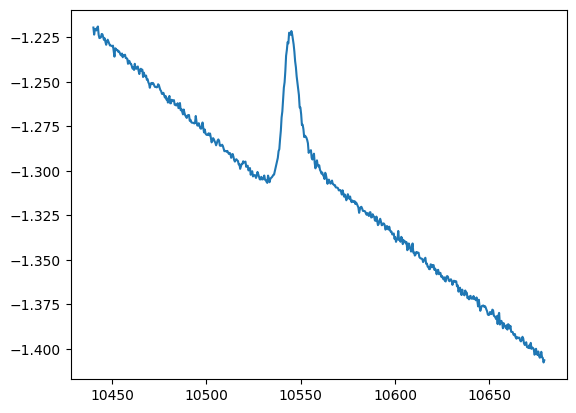

In [2]:
#file = r'Z:\visitor\a311213\bm31\20240123\pylatus\standards\columns\CuFoil_postIcePaP_Shutdown_Cu_exafs\regrid/CuFoil_postIcePaP_Shutdown_Cu_exafs_0001.dat'
file = r'C:\Users\kenneth1a\Documents\beamlineData\a311222\Ex_Situ_231105\columns\CHE34_fresh_Re_xanes\regrid/CHE34_fresh_Re_xanes_0000.dat'
#file = r'/mnt/x/users/a311213/standards/columns/CuFoil_postIcePaP_Shutdown_Cu_exafs/regrid/CuFoil_postIcePaP_Shutdown_Cu_exafs_0001.dat'
array = np.loadtxt(file,skiprows = 3,unpack = True)
df = pd.read_csv(file,sep = '\s',comment = '#',index_col = 0, header = 0)
x = array[0]*1000
y = np.log(array[1]/array[2])
#y = array[1]
#x *= 1000
plt.figure()
plt.plot(x,y)

ds = pd.Series(data = y, index=x)

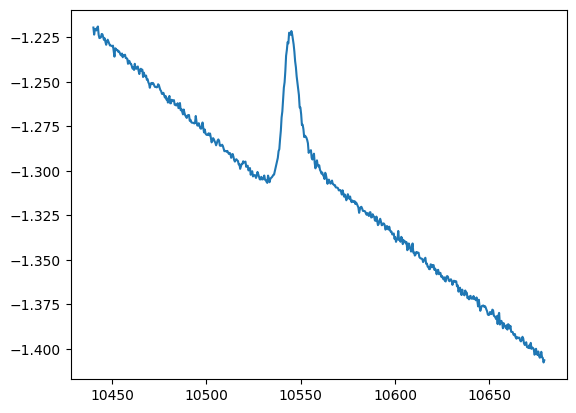

In [3]:
plt.plot(ds.index.values,ds.values)


In [4]:
myGroup = Group(energy = x, mu = y)
find_e0(energy = x, mu = y, group = myGroup)
print(myGroup.e0)
#autobk(energy=x,mu=y,group=myGroup,e0= myGroup.e0)
pre1 = x[0] - myGroup.e0 
print(pre1)
norm2 = x[-1] - myGroup.e0 
#pre_edge(energy = x, mu = y, group = myGroup,e0 = myGroup.e0,pre1 = pre1, pre2 = -0.030, norm1 = 0.15,norm2=norm2,nnorm = 2)
pre_edge(energy = x, mu = y, group = myGroup,e0 = myGroup.e0,pre1 = pre1, pre2 = -30, norm1 = 65,nnorm=1)

group2 = normalise(ds, kev = False)

print(group2.e0)

10540.65
-100.55000000000109
-100.55000000000109 -30 65 138.45000000000073
10540.65


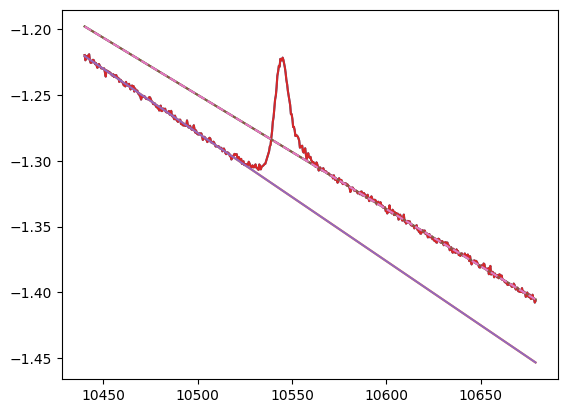

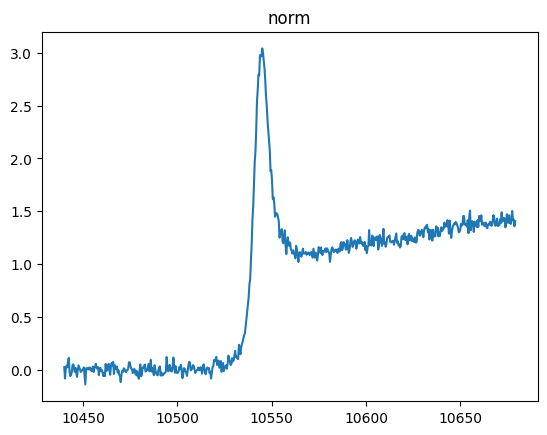

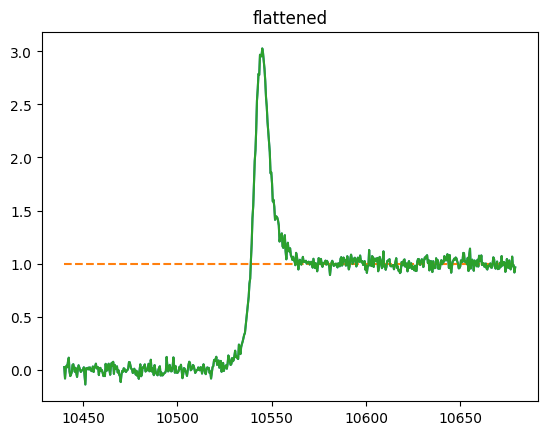

<Figure size 640x480 with 0 Axes>

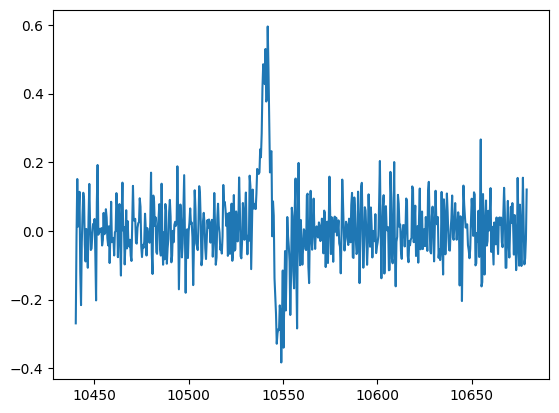

In [7]:
%matplotlib inline

plt.figure()
plt.plot(x,y)
plt.plot(x,myGroup.pre_edge)
plt.plot(x,myGroup.post_edge)

plt.plot(group2.energy,group2.mu)
plt.plot(x,group2.pre_edge)
plt.plot(x,group2.post_edge)
plt.plot([x[0],x[-1]],[myGroup.post_edge[0],myGroup.post_edge[-1]],'--')


plt.figure()
plt.plot(x,myGroup.norm)
plt.title('norm')

plt.figure()
plt.title('flattened')
plt.plot(x,myGroup.flat)
plt.plot(x,np.ones(len(x)),'--')

plt.plot(x,group2.flat)

plt.figure()
plt.figure('derivative')
plt.plot(x,myGroup.dmude)

In [43]:
help(Group)

Help on class Group in module larch.symboltable:

class Group(builtins.object)
 |  Group(name=None, **kws)
 |
 |  Generic Group: a container for variables, modules, and subgroups.
 |
 |  Methods defined here:
 |
 |  __copy__(self)
 |
 |  __deepcopy__(self, memo)
 |
 |  __dir__(self)
 |      return list of member names
 |
 |  __getitem__(self, key)
 |
 |  __id__(self)
 |
 |  __init__(self, name=None, **kws)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  __iter__(self)
 |
 |  __len__(self)
 |
 |  __repr__(self)
 |      Return repr(self).
 |
 |  __setitem__(self, key, value)
 |
 |  items(self)
 |
 |  keys(self)
 |
 |  values(self)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object



In [1]:
from linComb import run

direc=  r'C:\Users\kenneth1a\Documents\beamlineData\a311222\Ex_Situ_231105\columns\CHE34_fresh_Re_xanes\regrid\norm'
fits = run(direc)
fits

ValueError: cannot get arrays for arrayname='norm'